In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import seaborn as sns

In [207]:
df = pd.read_csv("Churn_modelling.csv")

In [209]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [54]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

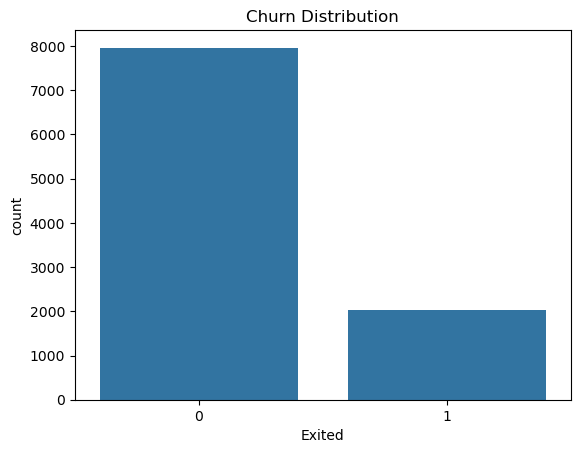

In [14]:
df['Exited'].value_counts(normalize=True)
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")

#this shows exited (churn) data is imbalance

In [16]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include =['object','category']).columns
print(f'numeric columns is {num_cols}')
print(f'categorical columns is {cat_cols}')

numeric columns is Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
categorical columns is Index(['Surname', 'Geography', 'Gender'], dtype='object')


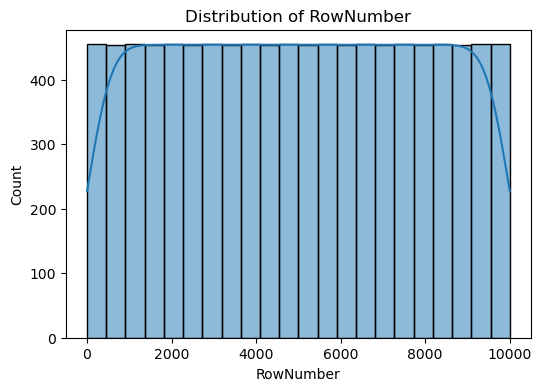

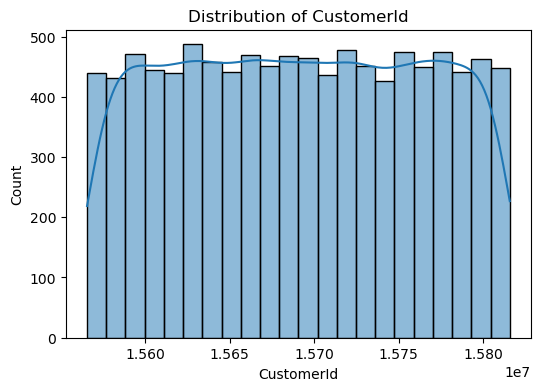

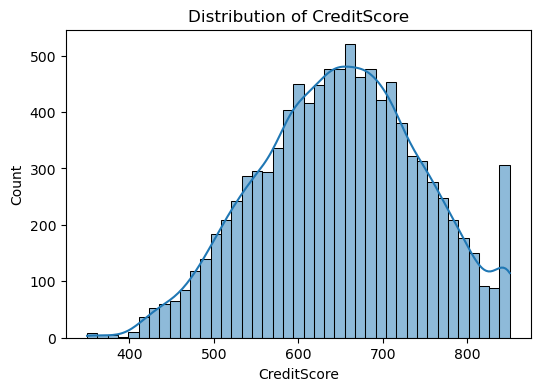

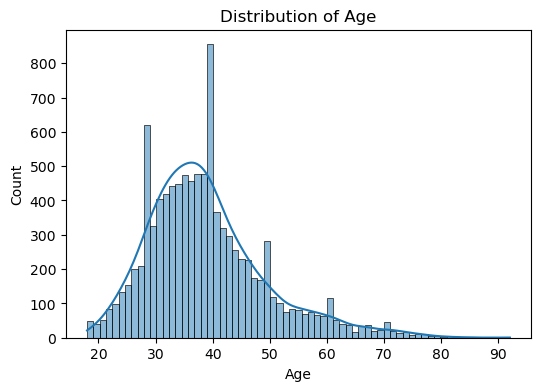

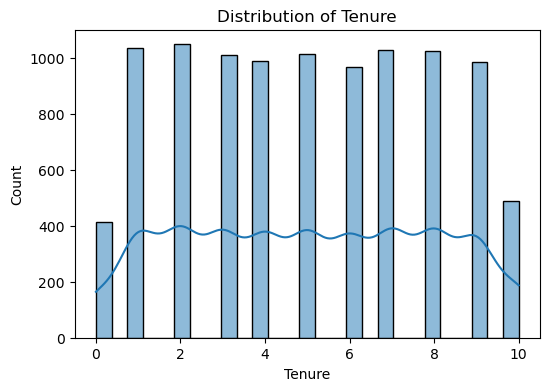

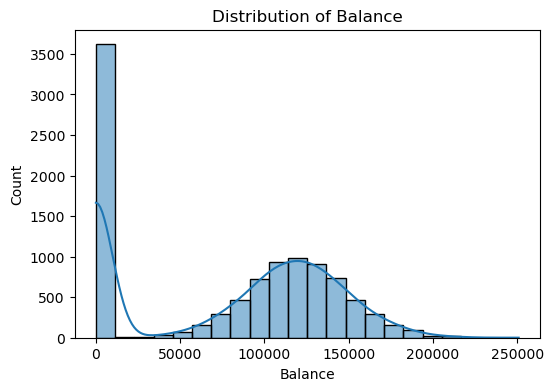

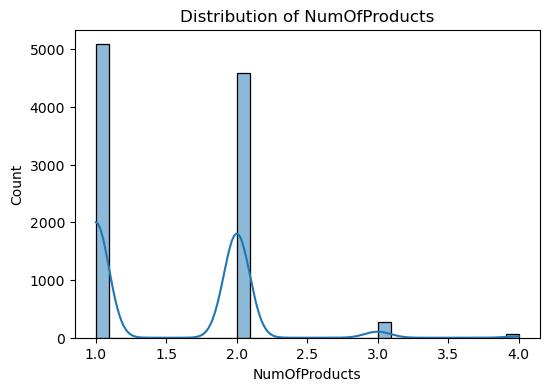

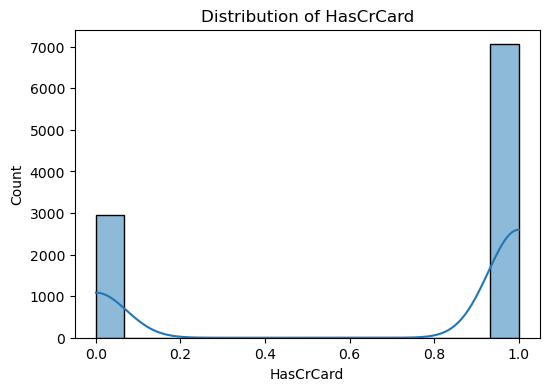

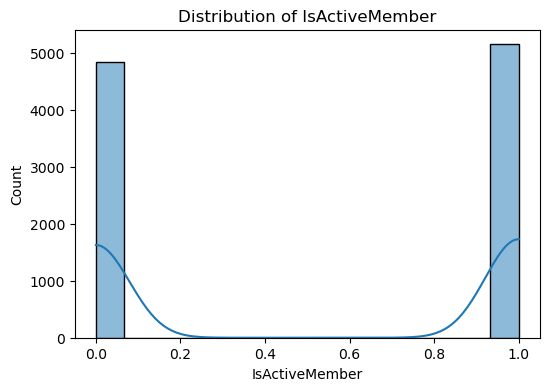

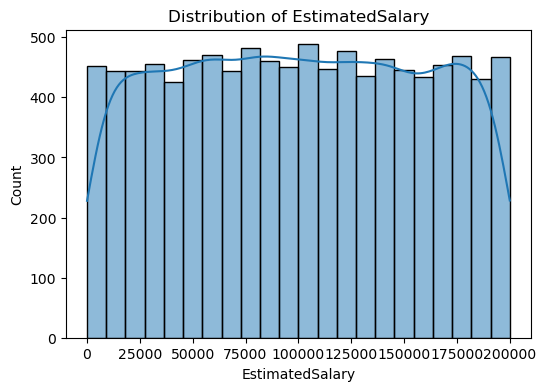

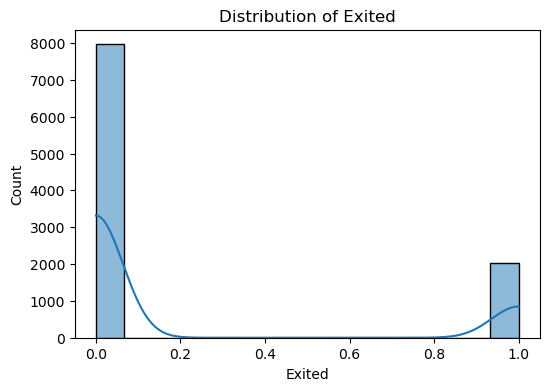

In [18]:
#univariate analysis

for col in num_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col], kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()

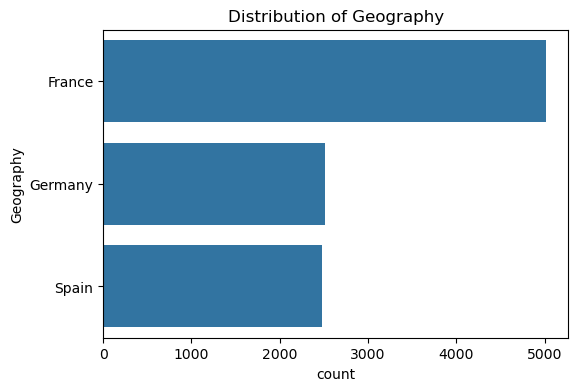

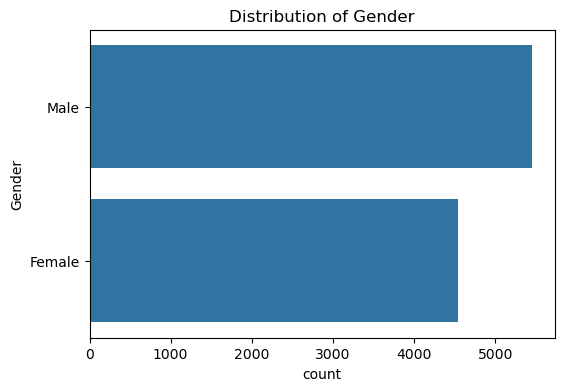

In [19]:
#univariate analysis of categorical columns
cat_cols = [col for col in cat_cols if col != "Surname"] #to exclude surname column as this is not suitable : give messy plot

for col in cat_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(y = col, data = df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

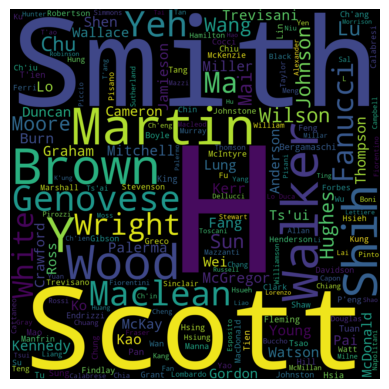

In [20]:
from wordcloud import WordCloud
surname_wc = WordCloud(width=1000, height=1000).generate(" ".join(df["Surname"]))
plt.imshow(surname_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bivairate analysis with churn column(target) known as churn

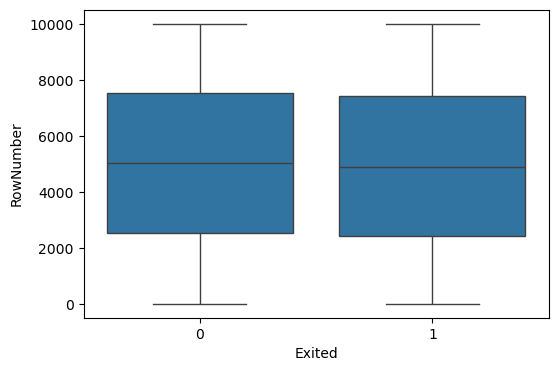

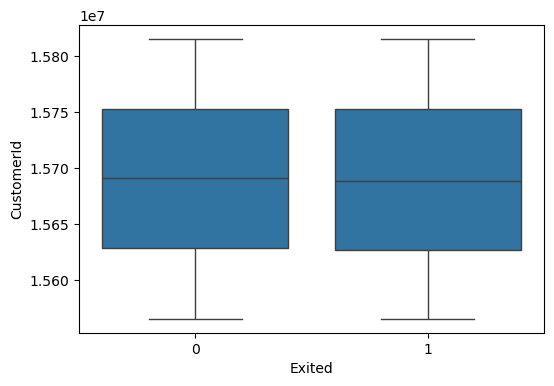

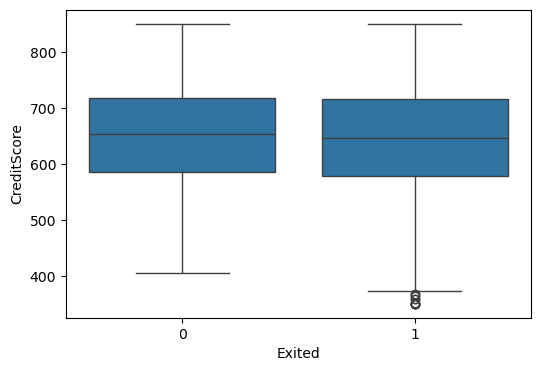

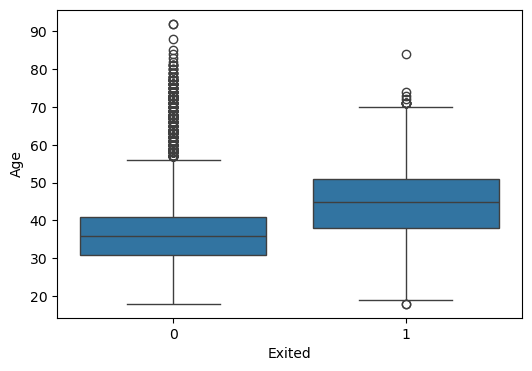

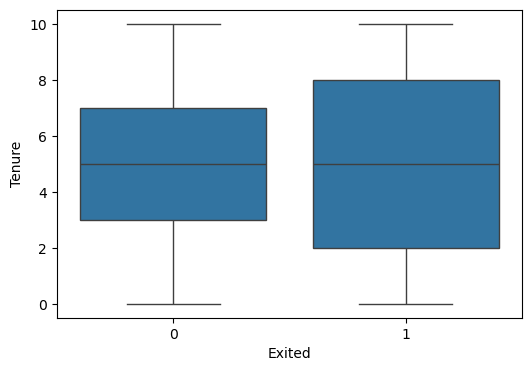

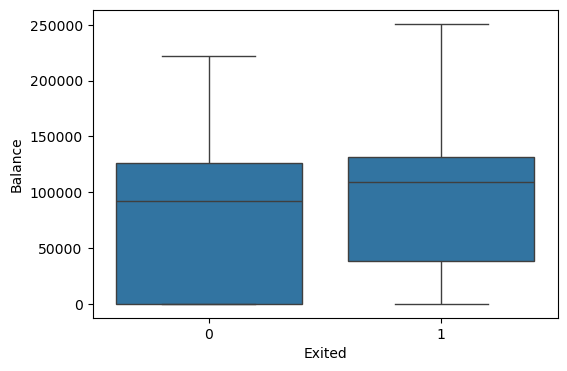

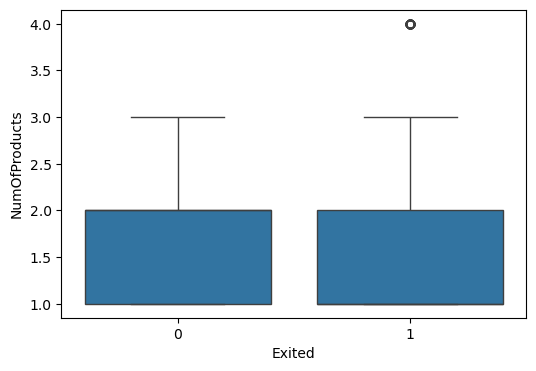

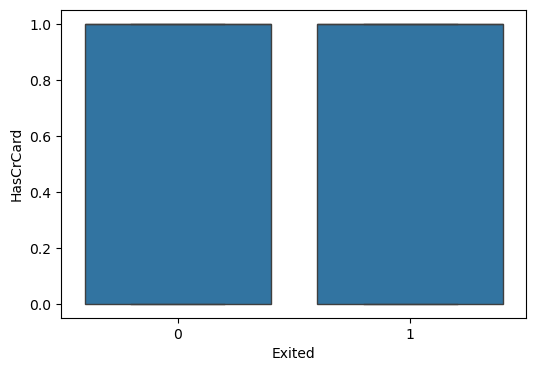

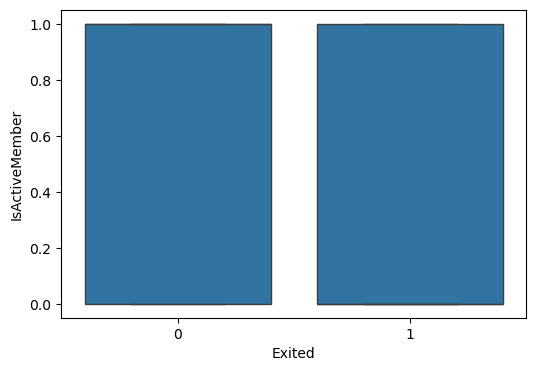

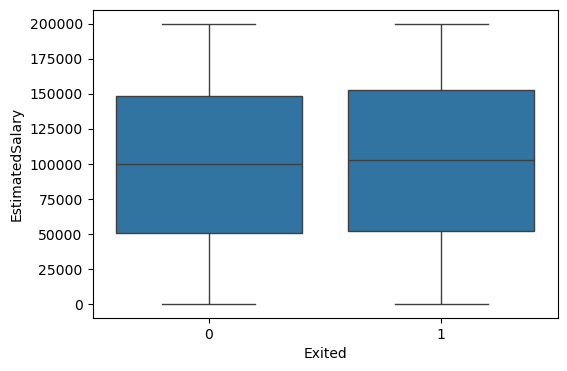

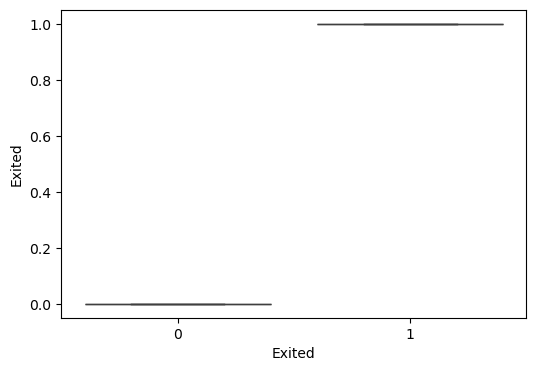

In [25]:
for col in num_cols: 
    plt.figure(figsize = (6,4))
    sns.boxplot(x='Exited', y = col, data = df)

In [27]:
!pip install ydata-profiling


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 6.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=025e1a5314c64aba31054fa764026bd82085b9ce079f533fbe9998052a88b7bc
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [29]:
#automated eda tools that summarize the majors parts of all the datasets which is far more better for basic eda 

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Churn EDA Report", explorative=True)
profile.to_notebook_iframe()  # or profile.to_file("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 45.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature engineering


In [211]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [213]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [215]:
#one hot encoding for categorical columns
df = pd.get_dummies(df, columns =['Geography','Gender'],drop_first = True)

In [217]:
x = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state =1 )

In [219]:
#normalize the features values as there is huge gap in ranges of values so we will normalize using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [221]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

In [108]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [138]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


## deeplearning implementation


In [118]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [225]:
model = Sequential()

model.add(Dense(11, activation= 'sigmoid', input_dim = 11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1, activation ='sigmoid'))


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [227]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [229]:
 model.compile(loss  = 'binary_crossentropy',optimizer = 'Adam', metrics =['accuracy'])

In [231]:
history =model.fit(x_train_scaled,y_train, epochs = 100, validation_split= 0.2, )

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3518 - loss: 0.8334 - val_accuracy: 0.7975 - val_loss: 0.5189
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7912 - loss: 0.5104 - val_accuracy: 0.7975 - val_loss: 0.4838
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7984 - loss: 0.4772 - val_accuracy: 0.7975 - val_loss: 0.4724
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8050 - loss: 0.4589 - val_accuracy: 0.7975 - val_loss: 0.4622
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8014 - loss: 0.4500 - val_accuracy: 0.7975 - val_loss: 0.4526
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8014 - loss: 0.4417 - val_accuracy: 0.8012 - val_loss: 0.4446
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8093 - loss: 0.4257 - val_accuracy: 0.8119 - val_loss: 0.4390
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8122 - loss: 0.4320 - val_accu

In [167]:
model.layers[1].get_weights()

[array([[ 0.25478166,  0.4731929 ,  0.03270154,  0.01450445,  0.1188574 ,
          0.19837357, -0.13887699,  0.3128322 ,  0.19145018,  0.32643944,
         -0.18551213],
        [-0.2998424 , -0.07014737, -0.37388942, -0.06581065, -0.4314313 ,
         -0.27056372, -0.35471153, -0.21471262, -0.18970497,  0.01450853,
          0.51966786],
        [ 0.49948192, -0.02885979,  0.13105772,  0.34533054, -0.0879209 ,
          0.3521617 ,  0.16700885, -0.7506706 ,  0.20210436, -0.23290206,
         -0.19528101],
        [ 0.10153461,  0.19637336,  0.03302795,  0.26875922,  0.01990803,
          0.27249292,  0.1074378 ,  0.12734942, -0.1836906 ,  0.15162005,
         -0.03508187],
        [ 0.46522957, -0.6236105 ,  0.2843272 , -0.12066246,  0.25428307,
         -0.12829173,  0.14125894, -0.47214448,  0.48757875,  0.04026857,
         -0.39467937],
        [ 0.34447858, -0.05282787,  0.08973289,  0.00234341,  0.32023036,
          0.10257157,  0.25151542,  0.03731162, -0.31086603, -0.3840080

In [233]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [235]:
y_pred = np.where(y_log >0.5, 1, 0)

In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.862

In [239]:
import matplotlib.pyplot as plt

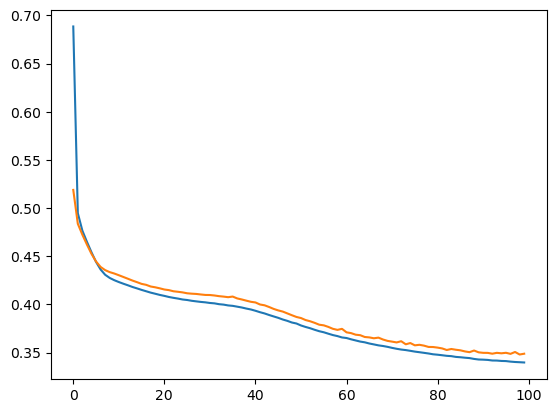

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


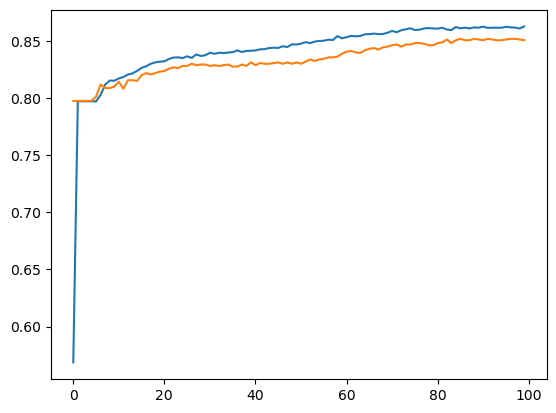

In [243]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])